In [1]:
import math
import random
import matplotlib.pyplot as plt
import asyncio
import time

async def test(i, n):
    print(f"任务{i}将休眠{n}秒")
    await asyncio.sleep(n)
    print(f"任务{i}在{n}秒后继续执行")


In [2]:

if __name__ =="__main__":

    """
    以X(0,0)为坐标原点点,往右和上方向分别衍生 m 距离 和 n 距离
    打击中心点应该为(m/2,n/2)
    """
    # 总长度为 2*n ，总宽度为 2*m
    #m = int(input("请输入需要的横向精度:"))
    #n = int(input("请输入需要的纵向精度:"))
    #Hit = int(input("请输入打击等级:"))
    #Res = int(input("请输入目标材质等级:"))
    m = 100
    n = 200
    Hit = 3
    Res = 3

    theta = Hit/Res

    dm = 0.01
    dn = 0.01
    k = 500


In [3]:
import nest_asyncio
nest_asyncio.apply()
#r_array = [[0 for i in range(m)] for j in range(n)]
#R_distance2 = [[0 for i in range(m)] for j in range(n)]
#p_array = [[0 for i in range(m)] for j in range(n)]
#X_array = [[0 for i in range(m)] for j in range(n)]

R_distance2 = [[0.0 for _ in range(n)] for _ in range(m)]
p_array = [[0.0 for _ in range(n)] for _ in range(m)]
X_array = [[0.0 for _ in range(n)] for _ in range(m)]

start_time = time.time()

task_list = [test(R_distance2, 0.1), test( p_array, 0.1), test(X_array, 0.1)]
loop = asyncio.get_event_loop()
loop.run_until_complete(asyncio.gather(*task_list))


任务[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

[None, None, None]

In [4]:

for i in range(m):
    for j in range(n):
        R_distance2[i][j] = (dm*(i-(m-1)/2))**2+ (dn*(j-(n-1)/2))**2
        p_array[i][j] = math.exp(-R_distance2[i][j]/k/theta)
        X_array[i][j] = 1-int(random.random()+1-p_array[i][j])

Picture_x = [[0.0 for _ in range(n)] for _ in range(m)]
Picture_y = [[0.0 for _ in range(n)] for _ in range(m)]


In [ ]:

for i in range(m):
    for j in range(n):
        if X_array[i][j] == 1:
            plt.scatter(i , j , s = .5 ,color = 'b')

plt.show()





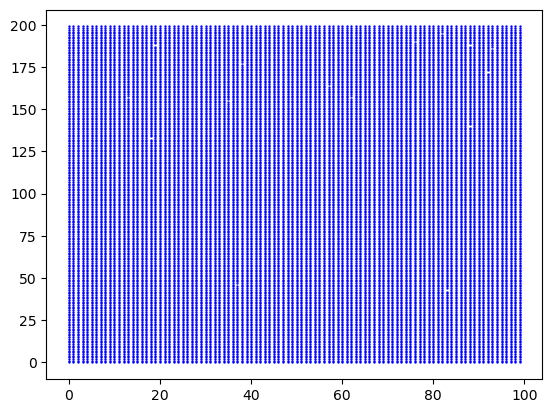

In [5]:
import nest_asyncio
nest_asyncio.apply()

async def plot_async(i, j, X_array):
    if X_array[i][j] == 1:
        plt.scatter(i , j , s = .5 ,color = 'b')

# ...

loop = asyncio.get_event_loop()
plot_tasks = []
for i in range(m):
    for j in range(n):
        task = loop.create_task(plot_async(i, j, X_array))
        plot_tasks.append(task)
await asyncio.gather(*plot_tasks)

plt.show()